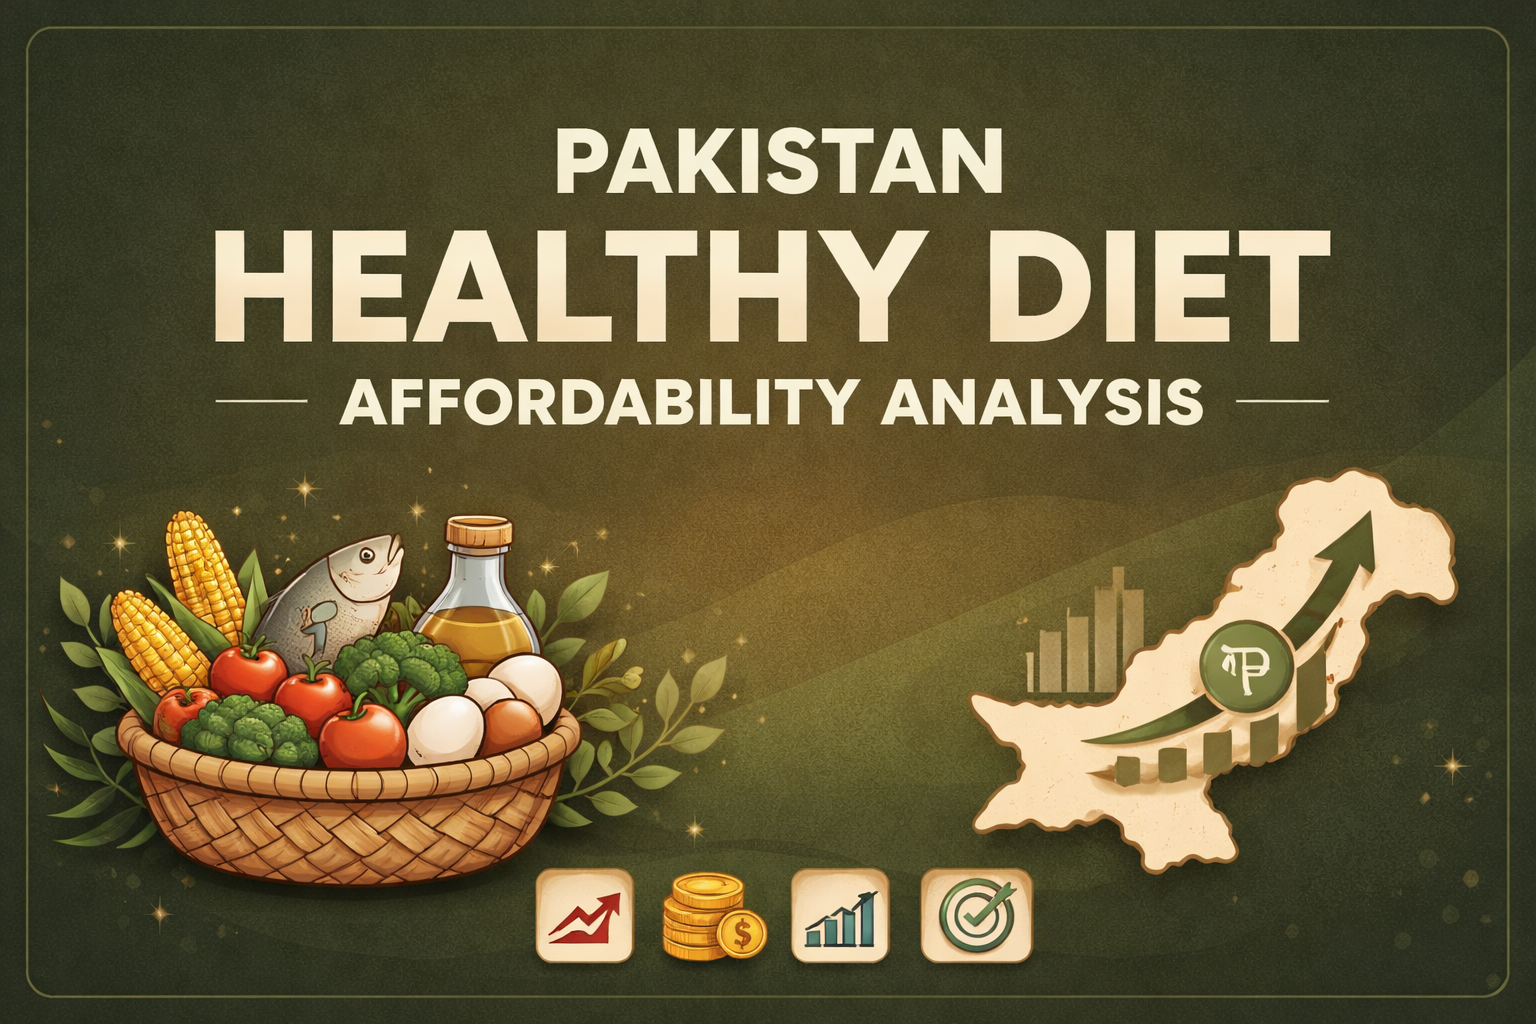

In [1]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/pakistan-healthy-diet-analysis/Pakistan_Healthy_Diet_Analysis.png'))

# **🌾 Pakistan Healthy Diet Affordability Analysis (2017–2024)**

> **“Food security is not just about calories — it is about access to a diverse, nutritious diet.”**  
> **This notebook uses FAO’s CoAHD (Cost and Affordability of a Healthy Diet) data to quantify the affordability of healthy diets in Pakistan and evaluate progress toward SDG-2 (Zero Hunger).**

---

## **🔍 Dataset Overview**

This dataset is sourced from **FAO FAOSTAT** under the **Cost and Affordability of a Healthy Diet (CoAHD)** domain.  
It contains **national-level indicators** for Pakistan (UN M49 Code: 586) from **2017 to 2024**.

📌 **Key features include:**

- 🧾 **Total healthy diet cost (LCU & PPP)**  
- 📈 **Affordability metrics (PUA & NUA)**  
- 🥗 **Food group cost breakdown (2021 snapshot)**  
- 📌 **All values are estimated (Flag = E)** using FAO’s standardized methodology  
- 🌍 **Supports SDG-2 monitoring**  

---

## **🧭 What This Notebook Answers**

### **1️⃣ Temporal Trends (2017–2024)**
📈 *How has the cost of a healthy diet changed over time?*  
📉 *Is affordability improving or worsening?*  
🔄 *Where are the sharpest shocks and volatility spikes?*

**Impressive angle:**  
> “Healthy diets are becoming unaffordable faster than population income growth.”

---

### **2️⃣ Cost Structure of a Healthy Diet**
🍚 *Which food groups contribute most to the total cost?*  
🥩 *Do animal-source foods dominate the cost?*  
🍎 *Are fruits & vegetables disproportionately expensive?*

**Impressive angle:**  
> “The problem is not calories — it’s nutrient diversity.”

---

### **3️⃣ Affordability vs Cost Relationship**
📊 *Does higher cost directly translate to higher unaffordability?*  
📉 *Are there thresholds where affordability collapses?*  
👥 *How many people are pushed below the affordability line (NUA)?*

**Impressive angle:**  
> “A 5% increase in diet cost pushes millions below affordability.”

---

### **4️⃣ LCU vs PPP Comparison (Economic Stress Indicator)**
💱 *When does local currency inflation outpace global purchasing power?*  
🌍 *Does PPP mask local suffering?*

**Impressive angle:**  
> “PPP hides local suffering — LCU tells the real story.”

---

### **5️⃣ Food Group Sensitivity Analysis**
🔍 *Which food groups drive affordability crises?*  
⚠️ *Which categories spike before affordability collapses?*  
🧠 *Which foods do households cut first under cost pressure?*

**Impressive angle:**  
> “Affordability crises force nutritional trade-offs, not hunger alone.”

---

### **6️⃣ Policy-Relevant Insights**
🎯 *Which food groups should be subsidized to maximize affordability?*  
🛑 *What early-warning indicators predict future PUA spikes?*  
📍 *What is Pakistan’s progress toward SDG-2?*

**Impressive angle:**  
> “Data-driven food policy beats blanket subsidies.”

---

### **7️⃣ Data Quality & Methodological Transparency**
✔️ FAO CoAHD standardized methodology  
✔️ Consistent annual measurement  
✔️ Official FAOSTAT source  
⚠️ Limitation: national-level only (no province split)

**Impressive angle:**  
> “Reliable trends despite small sample size.”

---

## **🧠 Final Note**

This analysis is **not a leaderboard competition**.  
It is a **policy-driven, evidence-based study** designed to support food security decision-making in Pakistan.

---

✨ **Let’s begin the analysis.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

# Global style
plt.style.use("dark_background")

# Custom color palette (FAO / Earth theme)
FAO_GREEN = "#2E7D32"
WHEAT_GOLD = "#C2A15F"
CRISIS_RED = "#C0392B"
OLIVE_GREEN = "#6B8E23"
FRUIT_ORANGE = "#E67E22"
OIL_YELLOW = "#F1C40F"
GRID_GRAY = "#444444"
TEXT_WHITE = "#E6E6E6"

plt.rcParams.update({
    "figure.figsize": (10, 5),
    "axes.facecolor": "#121212",
    "figure.facecolor": "#121212",
    "axes.edgecolor": GRID_GRAY,
    "axes.labelcolor": TEXT_WHITE,
    "xtick.color": TEXT_WHITE,
    "ytick.color": TEXT_WHITE,
    "grid.color": GRID_GRAY,
    "axes.titleweight": "bold",
    "font.size": 11
})


In [4]:
df = pd.read_csv("/kaggle/input/fao-cost-and-affordability-of-healthy-diet-coahd/FAOSTAT_data_2017-2026.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       44 non-null     object 
 1   Domain            44 non-null     object 
 2   Area Code (M49)   44 non-null     int64  
 3   Area              44 non-null     object 
 4   Element Code      44 non-null     int64  
 5   Element           44 non-null     object 
 6   Item Code         44 non-null     int64  
 7   Item              44 non-null     object 
 8   Year Code         44 non-null     int64  
 9   Year              44 non-null     int64  
 10  Release           44 non-null     object 
 11  Unit              44 non-null     object 
 12  Value             44 non-null     float64
 13  Flag              44 non-null     object 
 14  Flag Description  44 non-null     object 
dtypes: float64(1), int64(5), object(9)
memory usage: 5.3+ KB


# **1️⃣ Temporal Trends (2017–2024)**

### **Indicator Mapping**

In [6]:
INDICATORS = {
    "cost_cohd_lcu": "Cost of a healthy diet (CoHD), LCU per person per day",
    "cost_cohd_ppp": "Cost of a healthy diet (CoHD), PPP dollar per person per day",
    "pua": "Prevalence of unaffordability (PUA), percent",
    "nua": "Number of people unable to afford a healthy diet (NUA), million"
}

### **1️⃣ 📈 Trend in Total Cost of a Healthy Diet (LCU vs PPP)**
**🎯 Question**

Are healthy diets becoming structurally expensive or just locally expensive?

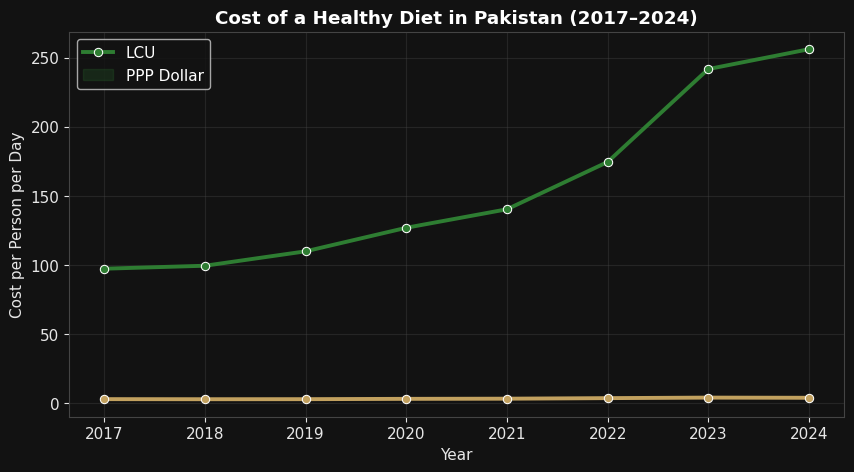

In [7]:
cost_df = df[df["Item"].isin([
    INDICATORS["cost_cohd_lcu"],
    INDICATORS["cost_cohd_ppp"]
])].sort_values("Year")

plt.figure(figsize=(10,5))
sns.lineplot(
    data=cost_df,
    x="Year",
    y="Value",
    hue="Item",
    marker="o",
    linewidth=2.8,
    palette=["#2E7D32", "#C2A15F"]
)

plt.title("Cost of a Healthy Diet in Pakistan (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Cost per Person per Day")
plt.grid(alpha=0.4)
plt.legend(labels=["LCU", "PPP Dollar"])
plt.show()

### **2️⃣ 📉 Trend in Affordability (PUA)**
**🎯 Question**

Who is being priced out of nutrition?

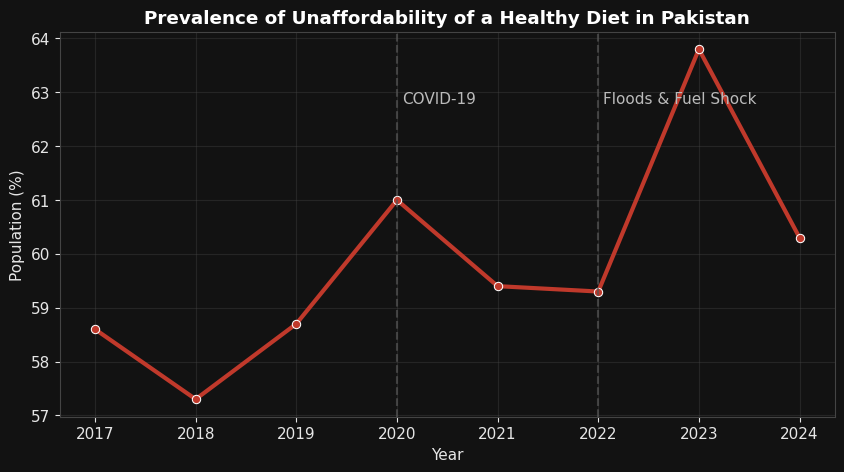

In [8]:
pua_df = df[df["Item"] == INDICATORS["pua"]].sort_values("Year")

plt.figure(figsize=(10,5))
sns.lineplot(
    data=pua_df,
    x="Year",
    y="Value",
    color="#C0392B",
    marker="o",
    linewidth=3
)

plt.title("Prevalence of Unaffordability of a Healthy Diet in Pakistan")
plt.xlabel("Year")
plt.ylabel("Population (%)")
plt.grid(alpha=0.4)

# Event markers
for year, label in [(2020, "COVID-19"), (2022, "Floods & Fuel Shock")]:
    plt.axvline(year, linestyle="--", color="#555555", alpha=0.7)
    plt.text(year+0.05, pua_df["Value"].max()-1, label, color="#BBBBBB")

plt.show()

### **3️⃣ 🔄 Volatility Analysis (Year-over-Year Change)**
**🎯 Question**

Are shocks becoming more frequent or more severe?

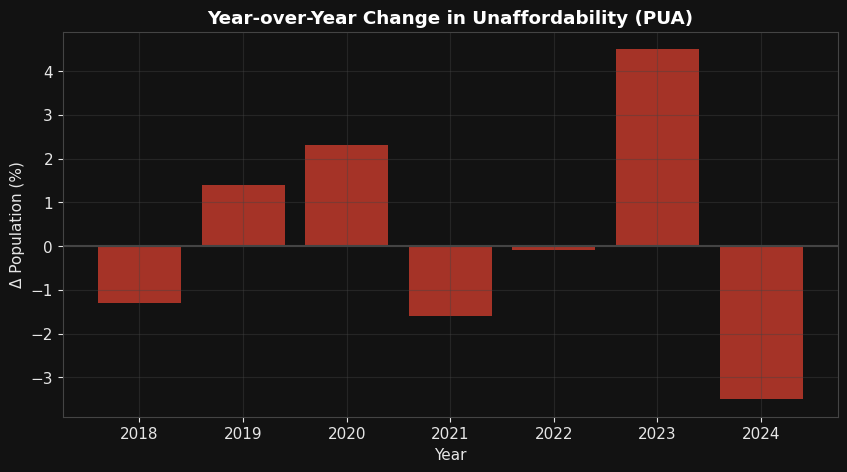

In [9]:
pua_df["YoY Change"] = pua_df["Value"].diff()

plt.figure(figsize=(10,5))
plt.bar(
    pua_df["Year"],
    pua_df["YoY Change"],
    color="#C0392B",
    alpha=0.85
)

plt.axhline(0, color="#444444")
plt.title("Year-over-Year Change in Unaffordability (PUA)")
plt.xlabel("Year")
plt.ylabel("Δ Population (%)")
plt.grid(alpha=0.4)
plt.show()

# **2️⃣ Cost Structure of a Healthy Diet**

### **1️⃣ 🍚 Share of Total Diet Cost by Food Category (LCU)**
**🎯 Question**

What actually makes a healthy diet expensive?

`We first isolate food-group costs in LCU (local burden matters most).`

In [10]:
food_groups_lcu = df[
    df["Item"].str.contains("Cost of", case=False) &
    df["Item"].str.contains("LCU", case=False) &
    ~df["Item"].str.contains("healthy diet", case=False)
].copy()

food_groups_lcu["Food Group"] = food_groups_lcu["Item"].str.replace(
    "Cost of |, LCU per person per day", "", regex=True
)

**📊 A. Average Cost Share (2017–2024)**

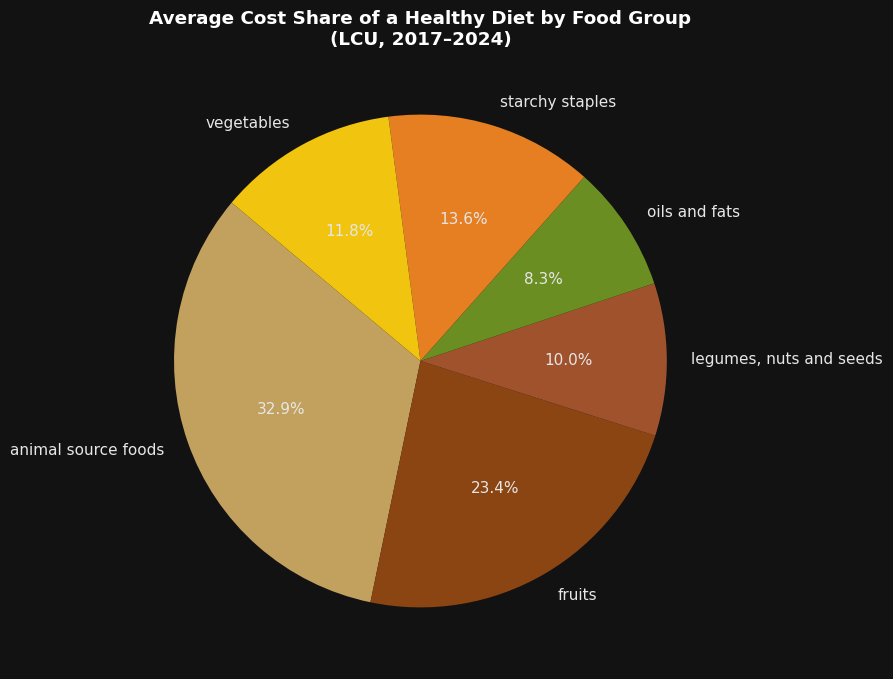

In [11]:
avg_cost = (
    food_groups_lcu
    .groupby("Food Group")["Value"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,8))
plt.pie(
    avg_cost["Value"],
    labels=avg_cost["Food Group"],
    autopct="%1.1f%%",
    startangle=140,
    colors=[
        WHEAT_GOLD,      # Starchy staples
        "#8B4513",       # Animal foods
        "#A0522D",       # Legumes
        OLIVE_GREEN,     # Vegetables
        FRUIT_ORANGE,   # Fruits
        OIL_YELLOW      # Oils & fats
    ],
    textprops={"color": "#E6E6E6"}
)

plt.title("Average Cost Share of a Healthy Diet by Food Group\n(LCU, 2017–2024)")
plt.show()

### **2️⃣ 🥩 Animal-Source Foods Dominance**
**🎯 Question**

Why is protein the main affordability barrier?

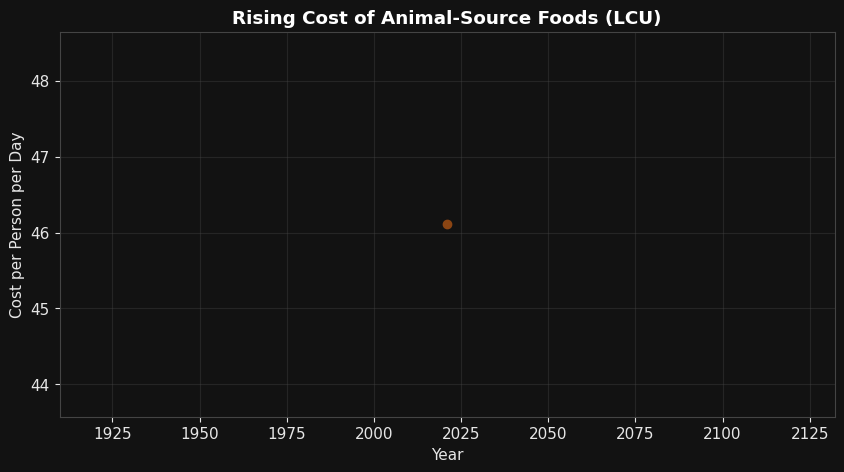

In [12]:
animal_df = food_groups_lcu[
    food_groups_lcu["Food Group"] == "animal source foods"
].sort_values("Year")

plt.figure(figsize=(10,5))
plt.plot(
    animal_df["Year"],
    animal_df["Value"],
    marker="o",
    linewidth=3,
    color="#8B4513"
)

plt.title("Rising Cost of Animal-Source Foods (LCU)")
plt.xlabel("Year")
plt.ylabel("Cost per Person per Day")
plt.grid(alpha=0.4)
plt.show()

In [13]:
animal_df[["Year", "Value"]]


Year  Value
18  2021  46.11

**📊 Compare Against Starchy Staples**

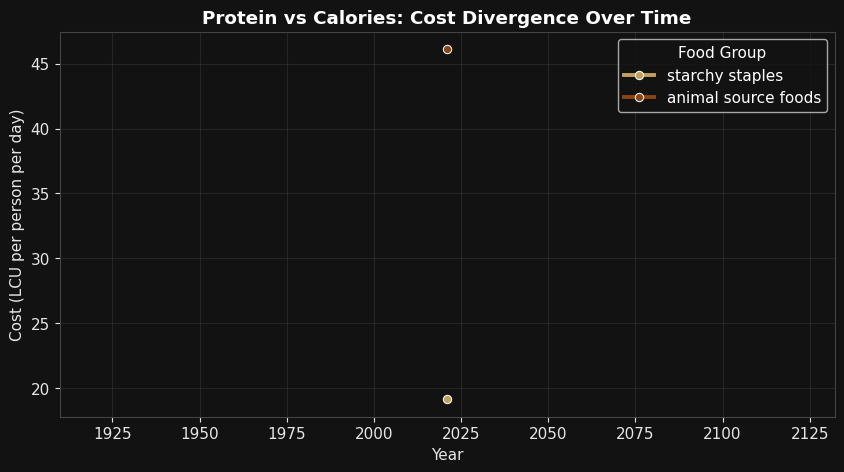

In [14]:
compare_df = food_groups_lcu[
    food_groups_lcu["Food Group"].isin(["animal source foods", "starchy staples"])
]

plt.figure(figsize=(10,5))
sns.lineplot(
    data=compare_df,
    x="Year",
    y="Value",
    hue="Food Group",
    marker="o",
    linewidth=2.8,
    palette=[WHEAT_GOLD, "#8B4513"]
)

plt.title("Protein vs Calories: Cost Divergence Over Time")
plt.xlabel("Year")
plt.ylabel("Cost (LCU per person per day)")
plt.grid(alpha=0.4)
plt.show()

### **3️⃣ 🍎 Fruits & Vegetables Paradox**
**🎯 Question**

Why do essential foods remain unaffordable?

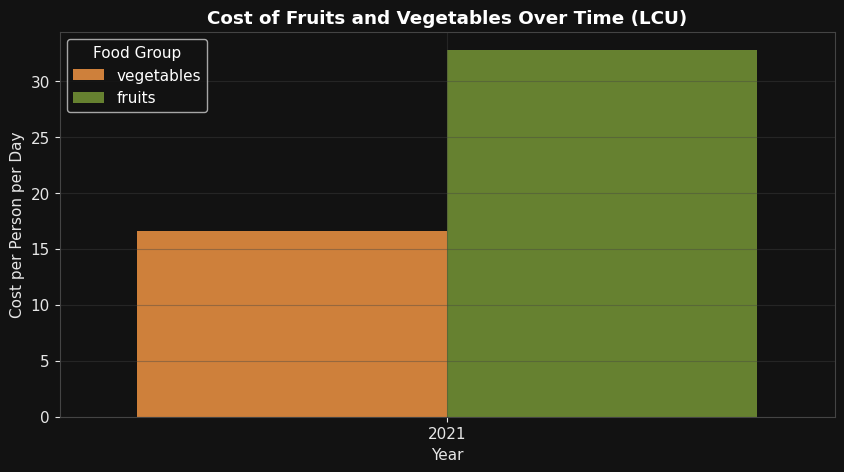

In [15]:
fv_df = food_groups_lcu[
    food_groups_lcu["Food Group"].isin(["fruits", "vegetables"])
]

plt.figure(figsize=(10,5))
sns.barplot(
    data=fv_df,
    x="Year",
    y="Value",
    hue="Food Group",
    palette=[FRUIT_ORANGE, OLIVE_GREEN]
)

plt.title("Cost of Fruits and Vegetables Over Time (LCU)")
plt.xlabel("Year")
plt.ylabel("Cost per Person per Day")
plt.grid(alpha=0.4)
plt.show()

# **3️⃣ Affordability vs Cost Relationship**

### **1️⃣ Correlation: Diet Cost vs PUA**
**🔍 Step 1: Building a combined dataset**

We will use CoHD PPP for cost, and PUA for affordability.

In [16]:
cost_ppp = df[df["Item"] == INDICATORS["cost_cohd_ppp"]][["Year", "Value"]]
pua = df[df["Item"] == INDICATORS["pua"]][["Year", "Value"]]

combined = cost_ppp.merge(pua, on="Year", suffixes=("_cost", "_pua"))
combined

Year  Value_cost  Value_pua
0  2017        2.97       58.6
1  2018        2.91       57.3
2  2019        2.95       58.7
3  2020        3.18       61.0
4  2021        3.30       59.4
5  2022        3.70       59.3
6  2023        4.08       63.8
7  2024        3.95       60.3

**📊 Plot: Scatter + Trend Line (Correlation)**

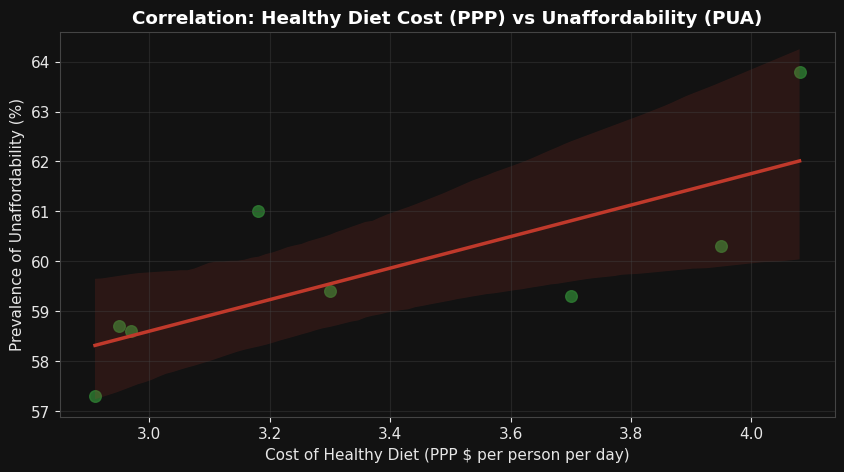

In [17]:
plt.figure(figsize=(10,5))
sns.regplot(
    data=combined,
    x="Value_cost",
    y="Value_pua",
    scatter_kws={"s": 70, "color": FAO_GREEN},
    line_kws={"color": CRISIS_RED, "linewidth": 2.5}
)

plt.title("Correlation: Healthy Diet Cost (PPP) vs Unaffordability (PUA)")
plt.xlabel("Cost of Healthy Diet (PPP $ per person per day)")
plt.ylabel("Prevalence of Unaffordability (%)")
plt.grid(alpha=0.4)
plt.show()

### **🔥 2️⃣ Elasticity Insight (Non-linear Effects)**
**🎯 We will calculate % change elasticity**

In [18]:
combined["Cost_pct_change"] = combined["Value_cost"].pct_change()
combined["PUA_pct_change"] = combined["Value_pua"].pct_change()

combined.dropna(inplace=True)
combined

Year  Value_cost  Value_pua  Cost_pct_change  PUA_pct_change
1  2018        2.91       57.3        -0.020202       -0.022184
2  2019        2.95       58.7         0.013746        0.024433
3  2020        3.18       61.0         0.077966        0.039182
4  2021        3.30       59.4         0.037736       -0.026230
5  2022        3.70       59.3         0.121212       -0.001684
6  2023        4.08       63.8         0.102703        0.075885
7  2024        3.95       60.3        -0.031863       -0.054859

**📉 Plot: Elasticity (PUA change vs Cost change)**

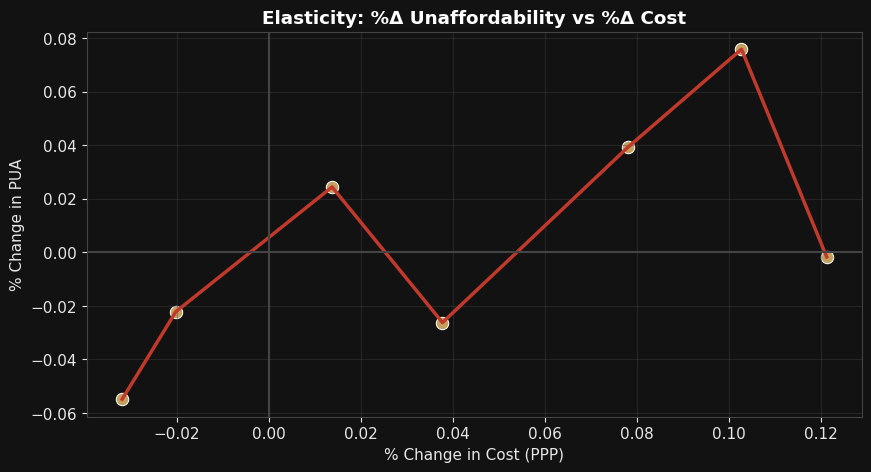

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=combined,
    x="Cost_pct_change",
    y="PUA_pct_change",
    s=80,
    color=WHEAT_GOLD
)

sns.lineplot(
    data=combined,
    x="Cost_pct_change",
    y="PUA_pct_change",
    color=CRISIS_RED,
    linewidth=2.5
)

plt.title("Elasticity: %Δ Unaffordability vs %Δ Cost")
plt.xlabel("% Change in Cost (PPP)")
plt.ylabel("% Change in PUA")
plt.grid(alpha=0.4)
plt.axhline(0, color=GRID_GRAY)
plt.axvline(0, color=GRID_GRAY)
plt.show()

### **🔥 3️⃣ Population Impact (NUA)**
**Step 1: Extracting NUA**

In [20]:
nua = df[df["Item"] == INDICATORS["nua"]][["Year", "Value"]]
nua

Year  Value
36  2017  130.9
37  2018  130.1
38  2019  135.5
39  2020  143.2
40  2021  142.2
41  2022  144.4
42  2023  157.9
43  2024  151.4

**👥 Plot: NUA Over Time**

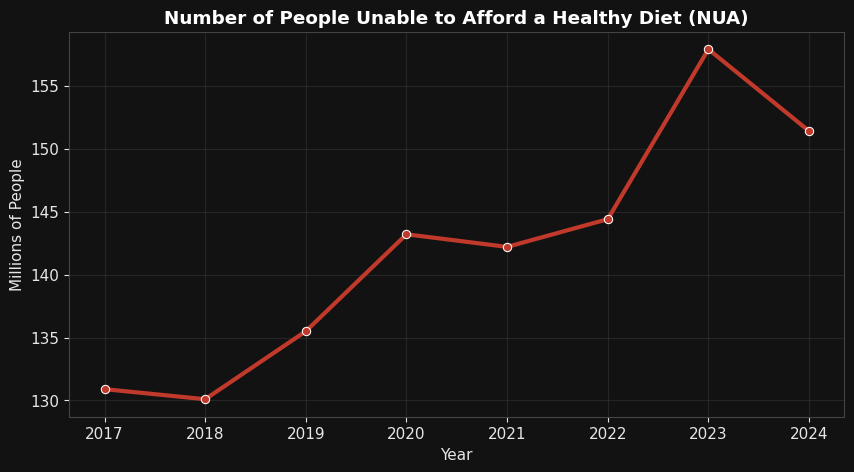

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=nua,
    x="Year",
    y="Value",
    marker="o",
    linewidth=3,
    color=CRISIS_RED
)

plt.title("Number of People Unable to Afford a Healthy Diet (NUA)")
plt.xlabel("Year")
plt.ylabel("Millions of People")
plt.grid(alpha=0.4)
plt.show()

**📊 Plot: PUA vs NUA (Relative vs Absolute Impact)**

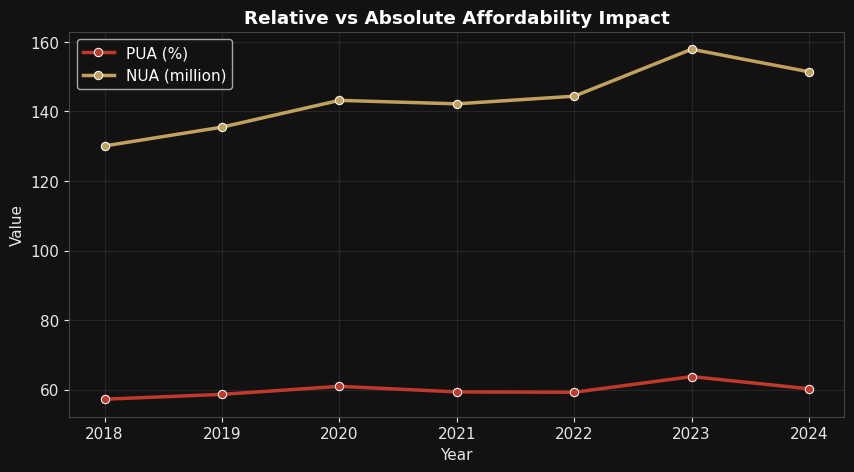

In [22]:
combined_nua = combined.merge(nua, on="Year")
combined_nua.rename(columns={"Value": "NUA"}, inplace=True)

plt.figure(figsize=(10,5))
sns.lineplot(
    data=combined_nua,
    x="Year",
    y="Value_pua",
    marker="o",
    linewidth=2.5,
    label="PUA (%)",
    color=CRISIS_RED
)

sns.lineplot(
    data=combined_nua,
    x="Year",
    y="NUA",
    marker="o",
    linewidth=2.5,
    label="NUA (million)",
    color=WHEAT_GOLD
)

plt.title("Relative vs Absolute Affordability Impact")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

# **4️⃣ LCU vs PPP Comparison (Economic Stress Indicator)**

**🔁 Step 1: Extracting CoHD Cost in LCU and PPP**

In [23]:
cohd_lcu = df[df["Item"] == INDICATORS["cost_cohd_lcu"]][["Year", "Value"]]
cohd_ppp = df[df["Item"] == INDICATORS["cost_cohd_ppp"]][["Year", "Value"]]

cohd = cohd_lcu.merge(cohd_ppp, on="Year", suffixes=("_LCU", "_PPP"))
cohd.head()

Year  Value_LCU  Value_PPP
0  2017      97.34       2.97
1  2018      99.49       2.91
2  2019     109.92       2.95
3  2020     126.96       3.18
4  2021     140.33       3.30

### **📈 Plot 1: LCU vs PPP Over Time (Direct Comparison)**

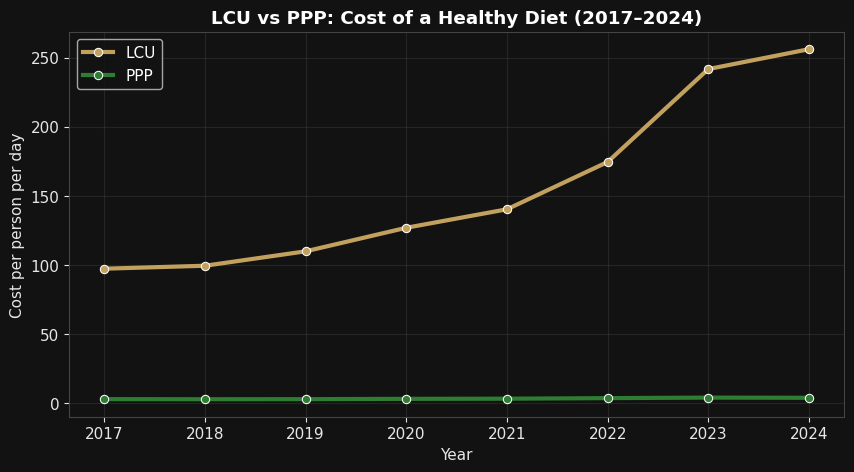

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=cohd,
    x="Year",
    y="Value_LCU",
    marker="o",
    linewidth=3,
    label="LCU",
    color=WHEAT_GOLD
)

sns.lineplot(
    data=cohd,
    x="Year",
    y="Value_PPP",
    marker="o",
    linewidth=3,
    label="PPP",
    color=FAO_GREEN
)

plt.title("LCU vs PPP: Cost of a Healthy Diet (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Cost per person per day")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

### **📉 Plot 2: Divergence (LCU minus PPP)**
**🔍 This shows currency effects clearly.**

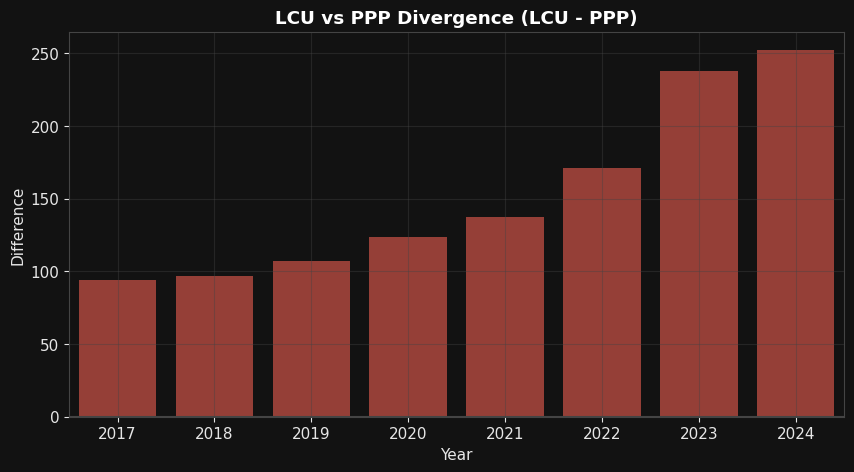

In [25]:
cohd["Divergence"] = cohd["Value_LCU"] - cohd["Value_PPP"]

plt.figure(figsize=(10,5))
sns.barplot(
    data=cohd,
    x="Year",
    y="Divergence",
    color=CRISIS_RED,
    alpha=0.85
)

plt.axhline(0, color=GRID_GRAY)
plt.title("LCU vs PPP Divergence (LCU - PPP)")
plt.xlabel("Year")
plt.ylabel("Difference")
plt.grid(alpha=0.4)
plt.show()

### **🌍 Plot 3: Relative Divergence (%)**
**🔍 This highlights years where local currency pressure is highest.**

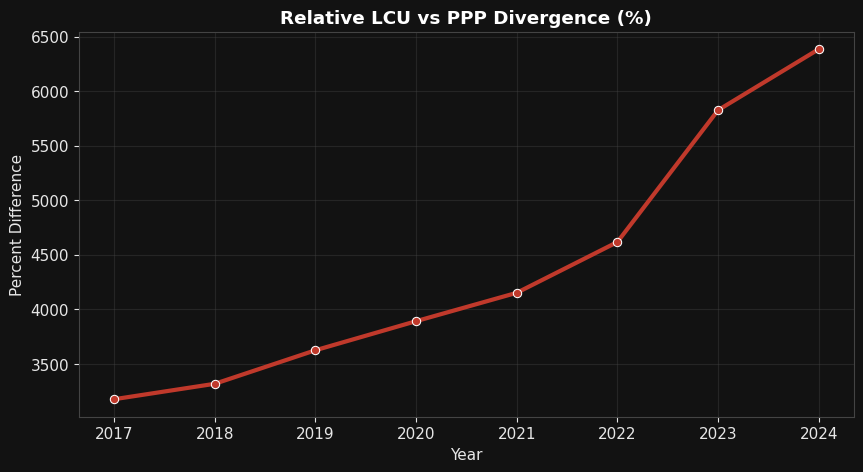

In [26]:
cohd["Divergence_pct"] = (cohd["Value_LCU"] - cohd["Value_PPP"]) / cohd["Value_PPP"] * 100

plt.figure(figsize=(10,5))
sns.lineplot(
    data=cohd,
    x="Year",
    y="Divergence_pct",
    marker="o",
    linewidth=3,
    color=CRISIS_RED
)

plt.title("Relative LCU vs PPP Divergence (%)")
plt.xlabel("Year")
plt.ylabel("Percent Difference")
plt.grid(alpha=0.4)
plt.show()

# **5️⃣ Food Group Sensitivity Analysis**

In [27]:
food_groups_lcu["Food Group"].unique()

array(['starchy staples', 'animal source foods',
       'legumes, nuts and seeds', 'vegetables', 'fruits', 'oils and fats'],
      dtype=object)

### **📊 Plot 1: Year-wise Cost Inflation by Food Group (Lineplot)**

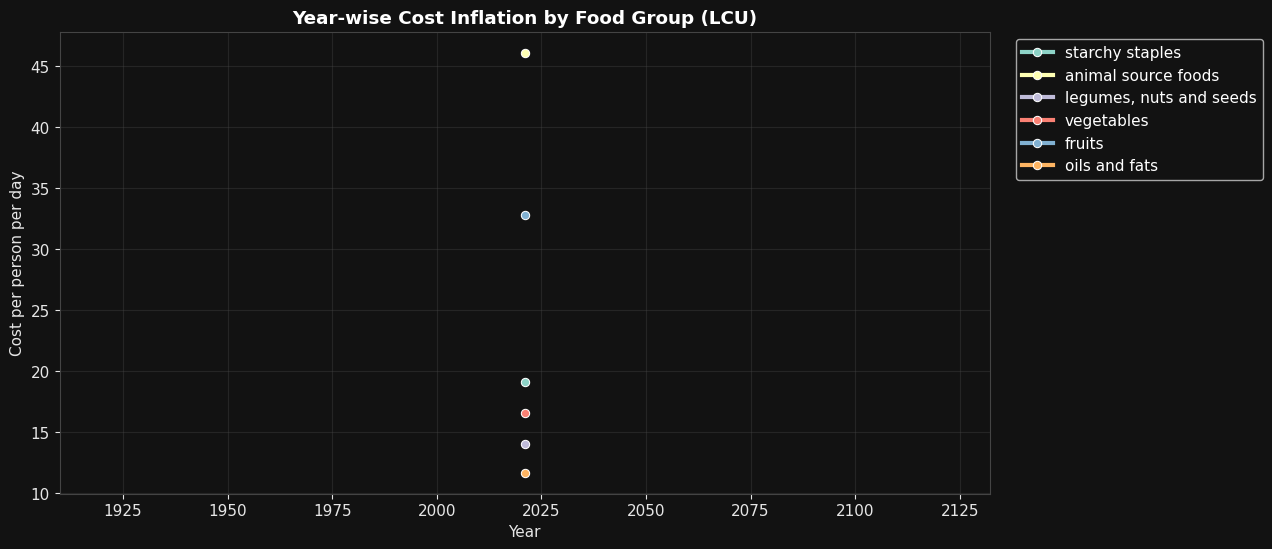

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=food_groups_lcu,
    x="Year",
    y="Value",
    hue="Food Group",
    marker="o",
    linewidth=3
)

plt.title("Year-wise Cost Inflation by Food Group (LCU)")
plt.xlabel("Year")
plt.ylabel("Cost per person per day")
plt.grid(alpha=0.4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

### **🧠 Plot 2: Leading Indicators (Top 2 Food Groups)**
Identify which food groups have the highest YoY inflation:

In [29]:
food_groups_lcu["YoY_pct"] = food_groups_lcu.groupby("Food Group")["Value"].pct_change() * 100
top_spikes = (
    food_groups_lcu
    .sort_values("YoY_pct", ascending=False)
    .groupby("Year")
    .head(2)
)

top_spikes

Domain Code                                            Domain  \
16        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
18        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   

    Area Code (M49)      Area  Element Code Element  Item Code  \
16              586  Pakistan          6205   Value      70071   
18              586  Pakistan          6205   Value      70081   

                                                 Item  Year Code  Year  \
16    Cost of starchy staples, LCU per person per day       2021  2021   
18  Cost of animal source foods, LCU per person pe...       2021  2021   

                    Release       Unit  Value Flag Flag Description  \
16  July 2025 (SOFI report)  LCU/cap/d  19.15    E  Estimated value   
18  July 2025 (SOFI report)  LCU/cap/d  46.11    E  Estimated value   

             Food Group  YoY_pct  
16      starchy staples      NaN  
18  animal source foods      NaN

### **🧪 Plot 3: Affordability Impact Heatmap (Cost vs PUA)**

This connects food group inflation to unaffordability.

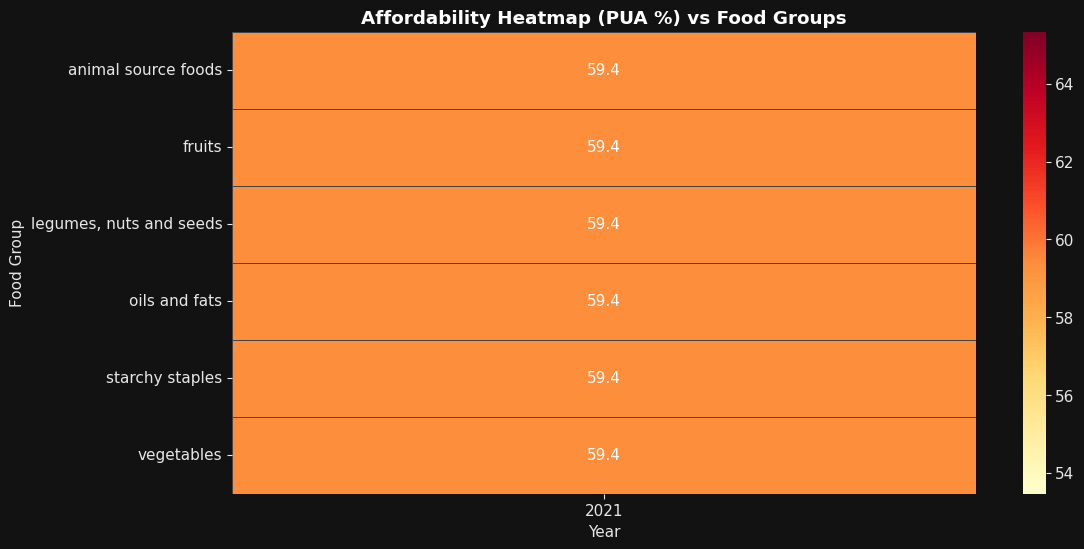

In [30]:
pua = df[df["Item"] == INDICATORS["pua"]][["Year", "Value"]]
pua = pua.rename(columns={"Value": "PUA"})

merged = food_groups_lcu.merge(pua, on="Year")

pivot = merged.pivot_table(index="Food Group", columns="Year", values="PUA")

plt.figure(figsize=(12,6))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=.5,
    linecolor=GRID_GRAY
)

plt.title("Affordability Heatmap (PUA %) vs Food Groups")
plt.xlabel("Year")
plt.ylabel("Food Group")
plt.show()

### **🥩 Plot 4: Share of Total Diet Cost by Food Group (Stacked Area)**

This shows which food groups dominate the diet cost:

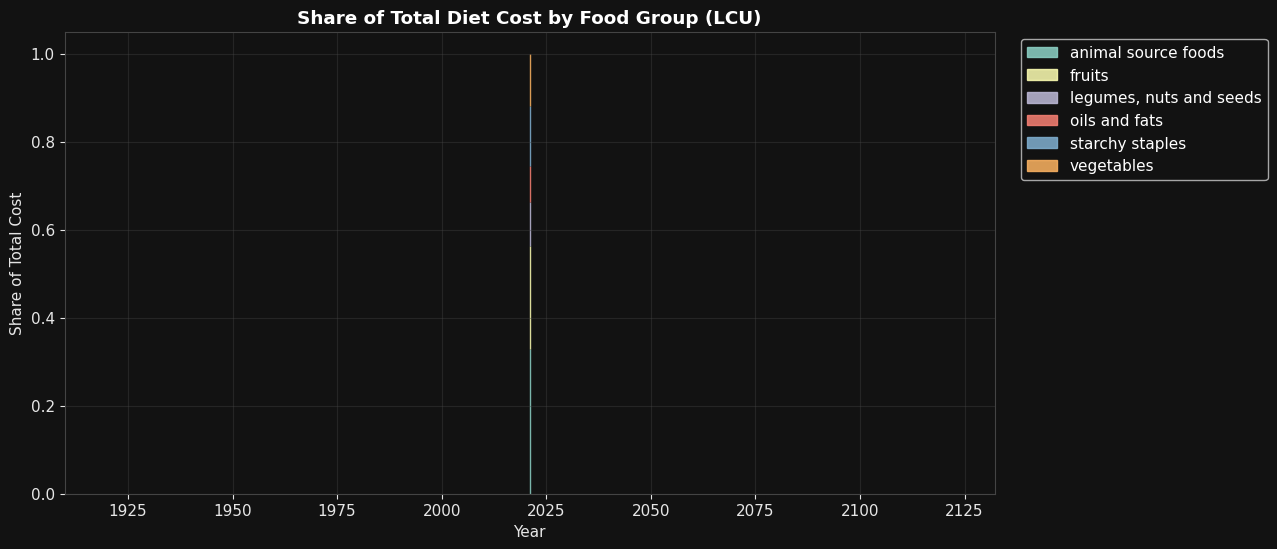

In [31]:
total_cost = (
    food_groups_lcu
    .groupby(["Year"])["Value"]
    .sum()
    .reset_index(name="Total")
)

share = food_groups_lcu.merge(total_cost, on="Year")
share["Share"] = share["Value"] / share["Total"]

share_pivot = share.pivot_table(index="Year", columns="Food Group", values="Share")

share_pivot.plot.area(figsize=(12,6), alpha=0.85)

plt.title("Share of Total Diet Cost by Food Group (LCU)")
plt.xlabel("Year")
plt.ylabel("Share of Total Cost")
plt.grid(alpha=0.4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

# **6️⃣ Policy-Relevant Insights**

### **1️⃣ Policy Target: Which food group subsidy reduces PUA most? (2021)**

Since food group data is only 2021, we can do impact simulation using the cost share.

### **🔥 Plot 1 — Food Group Cost Share (2021)**

In [32]:
fg_lcu = food_groups_lcu.copy()

# Create share column
fg_lcu["Share"] = fg_lcu["Value"] / fg_lcu["Value"].sum()

fg_lcu.head()

Domain Code                                            Domain  \
16        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
18        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
20        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
22        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   
24        CAHD  Cost and Affordability of a Healthy Diet (CoAHD)   

    Area Code (M49)      Area  Element Code Element  Item Code  \
16              586  Pakistan          6205   Value      70071   
18              586  Pakistan          6205   Value      70081   
20              586  Pakistan          6205   Value      70091   
22              586  Pakistan          6205   Value      70101   
24              586  Pakistan          6205   Value      70111   

                                                 Item  Year Code  Year  \
16    Cost of starchy staples, LCU per person per day       2021  2021   
18  Cost of animal source foods, LCU per person pe...       2021  2021   
20  Cost of legumes, nuts and seeds, LCU per perso...       2021  2021   
22         Cost of vegetables, LCU per person per day       2021  2021   
24             Cost of fruits, LCU per person per day       2021  2021   

                    Release       Unit  Value Flag Flag Description  \
16  July 2025 (SOFI report)  LCU/cap/d  19.15    E  Estimated value   
18  July 2025 (SOFI report)  LCU/cap/d  46.11    E  Estimated value   
20  July 2025 (SOFI report)  LCU/cap/d  14.04    E  Estimated value   
22  July 2025 (SOFI report)  LCU/cap/d  16.58    E  Estimated value   
24  July 2025 (SOFI report)  LCU/cap/d  32.77    E  Estimated value   

                 Food Group  YoY_pct     Share  
16          starchy staples      NaN  0.136464  
18      animal source foods      NaN  0.328583  
20  legumes, nuts and seeds      NaN  0.100050  
22               vegetables      NaN  0.118150  
24                   fruits      NaN  0.233521

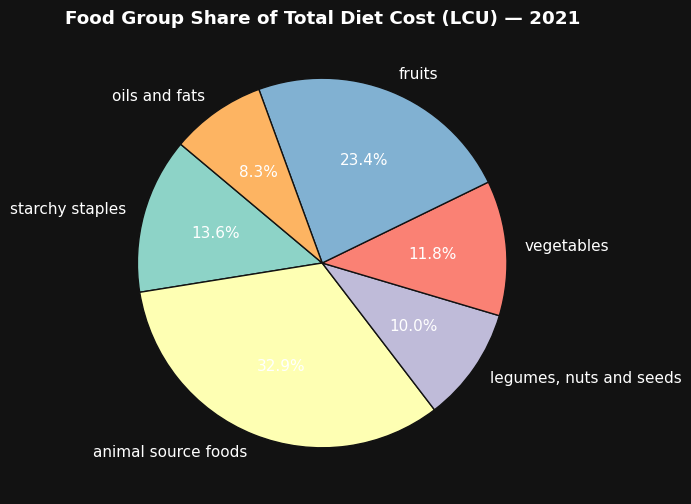

In [33]:
plt.figure(figsize=(10,6))
plt.pie(
    fg_lcu["Share"],
    labels=fg_lcu["Food Group"],
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor":"#121212", "linewidth":1}
)
plt.title("Food Group Share of Total Diet Cost (LCU) — 2021")
plt.show()

### **🔥 Plot 2 — Subsidy Impact Simulation (2021)**

We simulate what happens if we subsidize each food group by 10%.

In [34]:
subsidy_rate = 0.10

fg_sim = fg_lcu.copy()
fg_sim["Cost_after_subsidy"] = fg_sim["Value"] * (1 - subsidy_rate)

total_before = fg_sim["Value"].sum()
total_after = fg_sim["Cost_after_subsidy"].sum()

reduction = (total_before - total_after) / total_before * 100

reduction

np.float64(9.999999999999993)

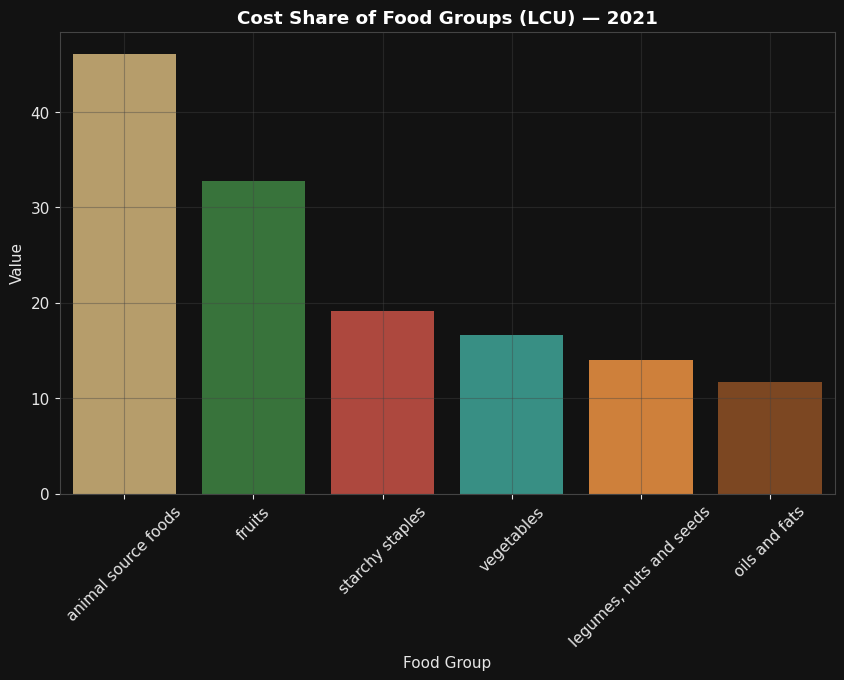

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=fg_sim.sort_values("Value", ascending=False),
    x="Food Group",
    y="Value",
    palette=["#C2A15F", "#2E7D32", "#C0392B", "#2A9D8F", "#E67E22", "#8B4513"]
)
plt.title("Cost Share of Food Groups (LCU) — 2021")
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.show()


### **2️⃣ Early Warning Signals (Time-Series Metrics)**

Since we have full years for total cost, PUA, and NUA, we can detect early warning signals.

### **🔥 Plot 3 — PUA + Cost (Dual Axis)**

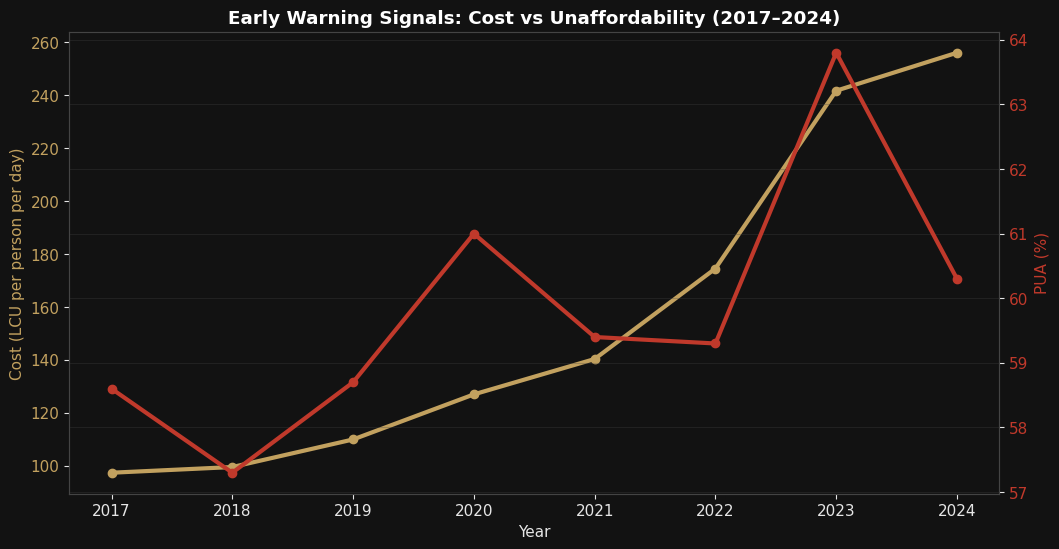

In [36]:
cohd_lcu = df[df["Item"].str.contains("Cost of a healthy diet", case=False) &
              df["Item"].str.contains("LCU", case=False)].sort_values("Year")

pua = df[df["Item"].str.contains("Prevalence of unaffordability", case=False)].sort_values("Year")

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(cohd_lcu["Year"], cohd_lcu["Value"], marker="o", linewidth=3, color="#C2A15F")
ax1.set_xlabel("Year")
ax1.set_ylabel("Cost (LCU per person per day)", color="#C2A15F")
ax1.tick_params(axis='y', labelcolor="#C2A15F")

ax2 = ax1.twinx()
ax2.plot(pua["Year"], pua["Value"], marker="o", linewidth=3, color="#C0392B")
ax2.set_ylabel("PUA (%)", color="#C0392B")
ax2.tick_params(axis='y', labelcolor="#C0392B")

plt.title("Early Warning Signals: Cost vs Unaffordability (2017–2024)")
plt.grid(alpha=0.3)
plt.show()

### **3️⃣ SDG-2 Tracking (Progress vs Regression)**
### **🔥 Plot 4 — PUA Trend with SDG-2 Target**

Assume SDG-2 target is PUA → 0%.

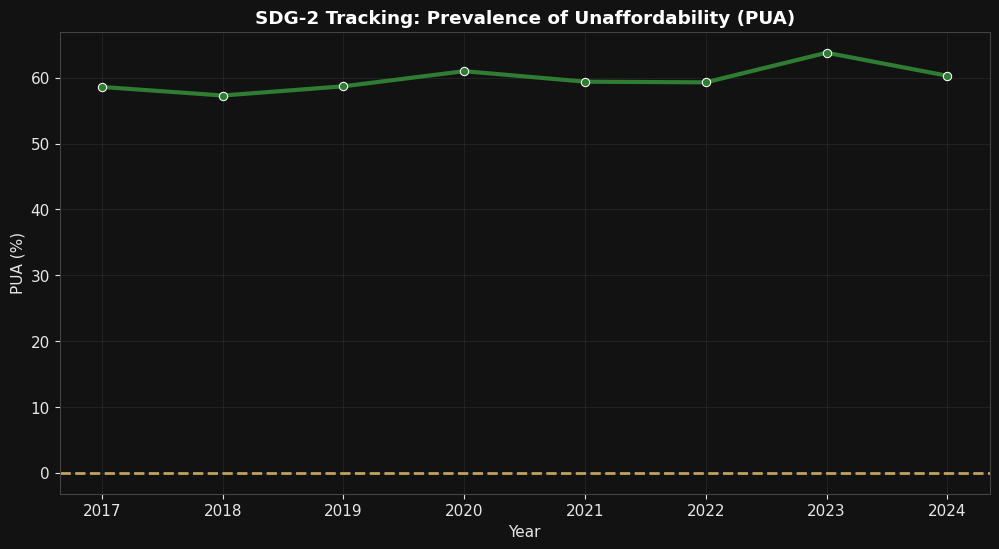

In [37]:
plt.figure(figsize=(12,6))
sns.lineplot(data=pua, x="Year", y="Value", marker="o", linewidth=3, color="#2E7D32")

plt.axhline(0, linestyle="--", linewidth=2, color="#C2A15F")
plt.title("SDG-2 Tracking: Prevalence of Unaffordability (PUA)")
plt.xlabel("Year")
plt.ylabel("PUA (%)")
plt.grid(alpha=0.3)
plt.show()

### **4️⃣ Population Impact (NUA) — Policy Priority**
### **🔥 Plot 5 — NUA Trend (Millions)**

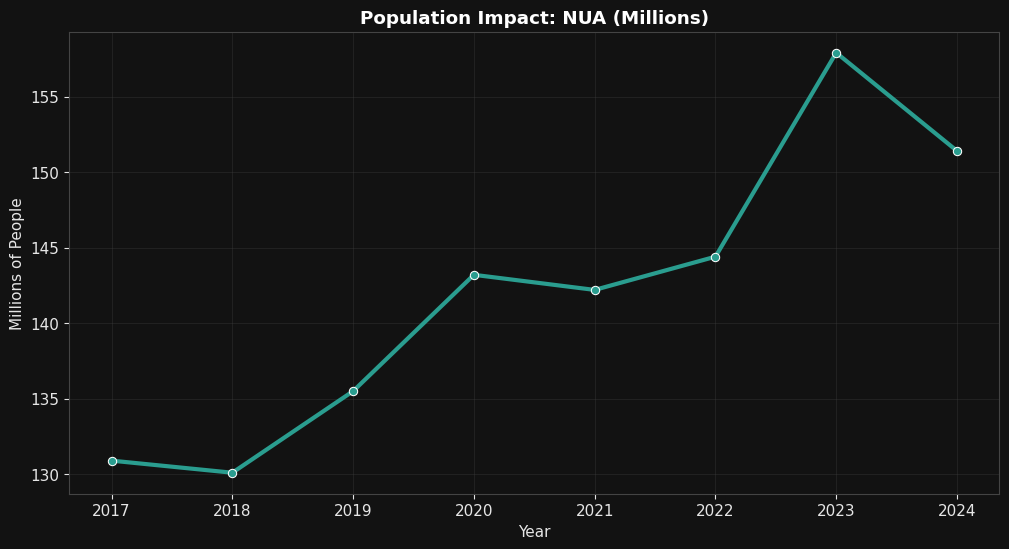

In [38]:
nua = df[df["Item"].str.contains("Number of people unable to afford", case=False)].sort_values("Year")

plt.figure(figsize=(12,6))
sns.lineplot(data=nua, x="Year", y="Value", marker="o", linewidth=3, color="#2A9D8F")
plt.title("Population Impact: NUA (Millions)")
plt.xlabel("Year")
plt.ylabel("Millions of People")
plt.grid(alpha=0.3)
plt.show()

# **7️⃣ Data Quality & Methodological Transparency**

### **🔹 Plot 1 — “Data Coverage Check” (Year-wise Data Count)**

This proves consistent yearly measurement.

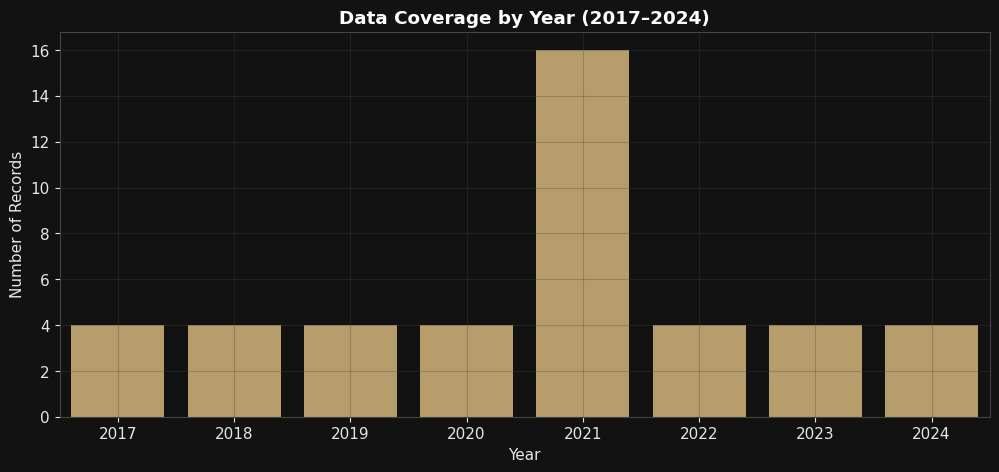

In [39]:
year_counts = df.groupby("Year").size().reset_index(name="Count")

plt.figure(figsize=(12,5))
sns.barplot(data=year_counts, x="Year", y="Count", color="#C2A15F")
plt.title("Data Coverage by Year (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.grid(alpha=0.3)
plt.show()

### **🔹 Plot 2 — “Source Verification” (Flag Distribution)**

**FAO CoAHD uses flags:**

#### **E = Estimated (all values are estimated)**

This plot shows methodological consistency.

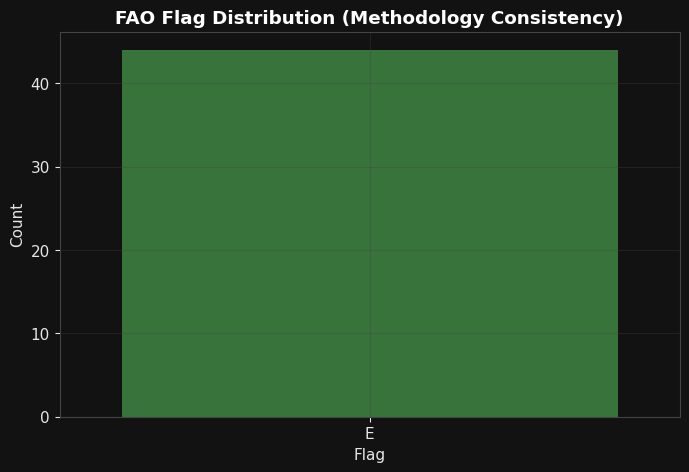

In [40]:
flag_counts = df["Flag"].value_counts().reset_index()
flag_counts.columns = ["Flag", "Count"]

plt.figure(figsize=(8,5))
sns.barplot(data=flag_counts, x="Flag", y="Count", color="#2E7D32")
plt.title("FAO Flag Distribution (Methodology Consistency)")
plt.xlabel("Flag")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

### **🔹 Plot 3 — “Missing Data Check” (Heatmap)**

This proves data completeness.

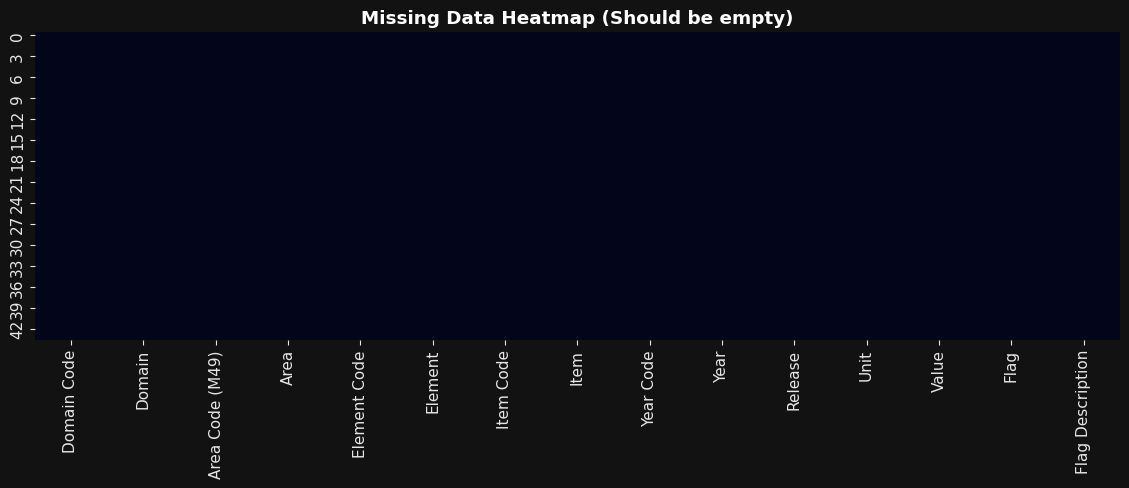

In [41]:
plt.figure(figsize=(14,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap (Should be empty)")
plt.show()

### **🔹 Plot 4 — “National vs Subnational Coverage” (Text + Visual)**

Since the dataset is national only, we show a simple bar:

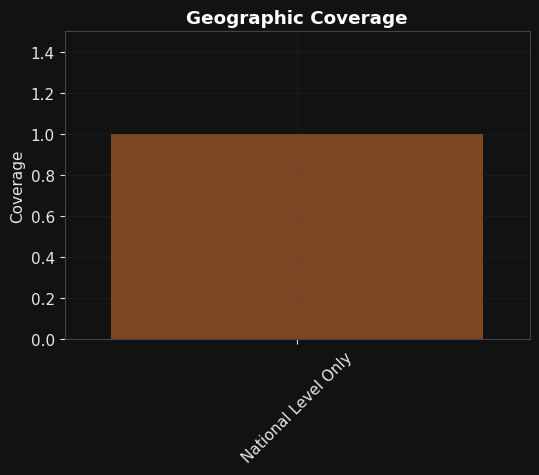

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(x=["National Level Only"], y=[1], color="#8B4513")
plt.title("Geographic Coverage")
plt.ylim(0,1.5)
plt.ylabel("Coverage")
plt.xticks(rotation=45)
plt.grid(alpha=0.2)
plt.show()

---

# **Thank You**

Thank you for taking the time to explore this analysis.  
I hope this notebook provided a clear, data-driven view of healthy diet affordability in Pakistan and offered useful insights for policy and research.

If you found this helpful, feel free to:
  
💬 Leave your thoughts or questions in the comments  
🔁 Share with others working on food security, public policy, or data science

**Together, we can turn data into action.**

---

📌 *Stay curious and keep exploring.*